![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#Image Deconstruction and Reconstruction using Singular Value Decomposition


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
##$\textbf{Application of Singular Value Decomposition : Low Rank Singular Value Approximation}$
###Description and Formal Definition for a singular layer approximation(using mathematical notation) :
We can break down a matrix into several layers using Singular Value Decomposition. If we were to remove a layer from the matrix, we would be decreasing the rank of the matrix. The rank can be defined as the number of layers within a matrix, and so by removing one, we directly decrease the rank of a matrix. The formal definition for a singular approximation of a layer of a matrix $A$ is $A_i = V_{:i}\lambda_{i}V_{i:}^{-1}$.

###Description and Formal Definition for a low-rank approximation(using mathematical notation) :
In order to approximate the layers for a low-rank matrix, we can apply the same formal definition we just derived. In order to compute the approximation for a low-rank matrix, we use the formal definition : $A = \sum^{n}_{i}V_{:i}\lambda_{i}V_{i:}^{-1}$ where $n$ is the rank of the matrix given and we find the right singular vectors, left singular vectors, and the singular values of the matrix and incorporate them into that equation and create the low-rank approximation.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


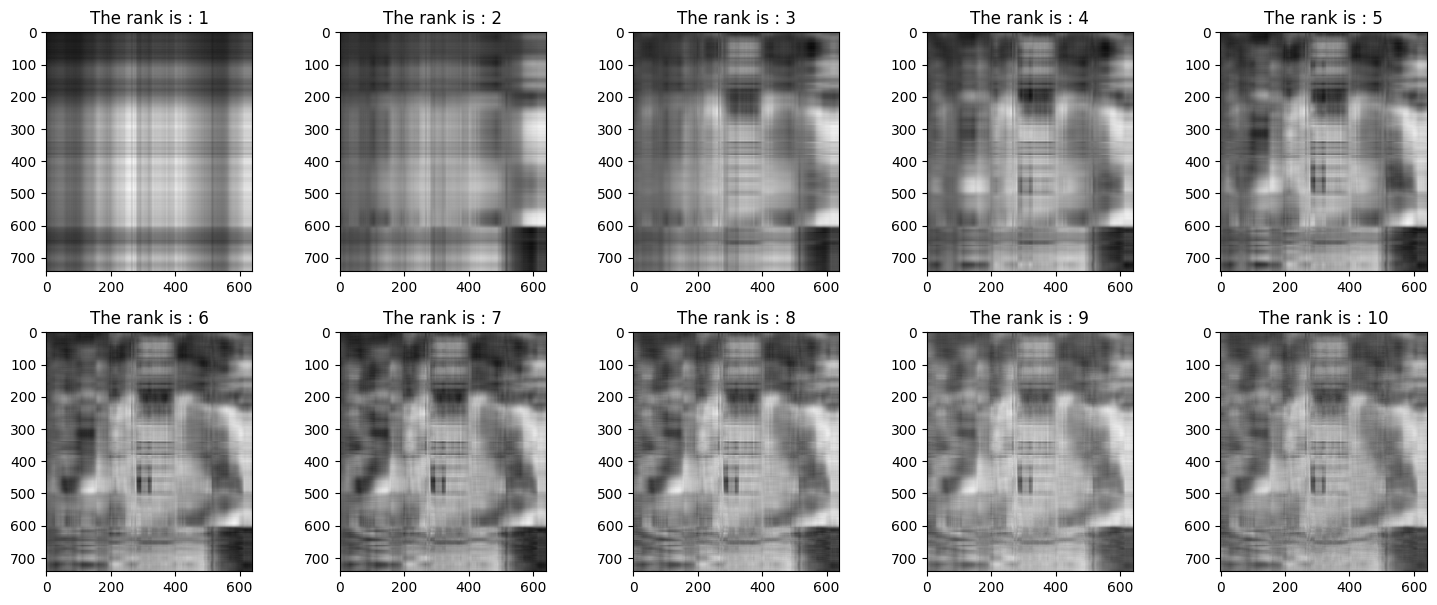

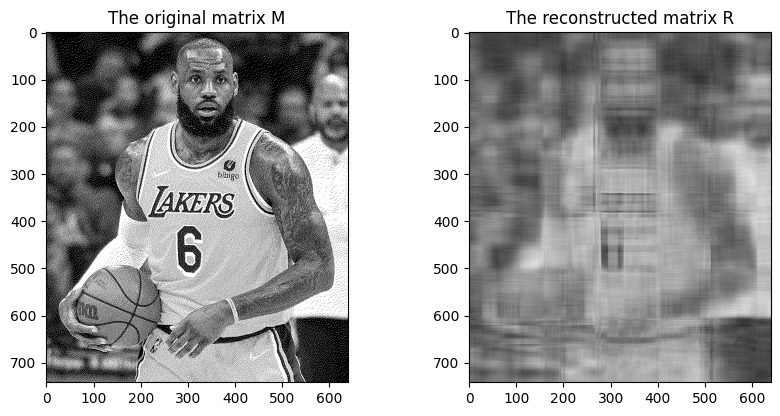

In [ ]:
# @title Low-Rank Approximation { run: "auto" }
# @markdown Enter the desired rank
rank = 10 # @param {type:"integer"}
from PIL import Image
import matplotlib.pyplot as plt
import PIL
import numpy as np
from numpy import*
import plotly.graph_objects as go
from google.colab import drive

drive.mount("/content/gdrive")
# find the url to your image
img_path = "/content/gdrive/MyDrive/LebronJames.jpeg"

# open the image
# pic = Image.open(img_path)

temp = Image.open(img_path)
temp = temp.convert('1')      # Convert to black&white
A = array(temp)             # Creates an array, white pixels==True and black pixels==False
new_A = empty((A.shape[0],A.shape[1]),None)    #New array with same size as A

for i in range(len(A)):
    for j in range(len(A[i])):
        if A[i][j]==True:
            new_A[i][j]=0
        else:
            new_A[i][j]=1
m = A.shape[0]
# create a reconstruction matrix

R = np.zeros((A.shape[0], A.shape[1]))

# compute singular value decomposition

U, S, V = np.linalg.svd(temp)

V = V.T.T

# lets take a look
k = m // 5

# create a plotting area for the layer
if(m % 5 == 0) :
  k = m // 5
else :
  k = (m // 5) + 1

plt.figure(figsize = (3 * 5, 3 * k))

# create a loop for summing over m layers
for i in range(rank) :
  # reshape left and right singular vectors
  a = np.reshape(V[i, :], (V.shape[0], 1))
  b = np.reshape(U[:, i], (U.shape[0], 1))
  # add layer to reconstructed matrix
  R += S[i] * (b * a.T)
  # plot the layers using imshow()
  plt.subplot(k, 5, (i + 1))
  plt.imshow(R, cmap = "gray")
  plt.title(f"The rank is : {np.linalg.matrix_rank(R)}")

# plot the orignal matrix
plt.tight_layout()
plt.show()

plt.figure(figsize = (5 * 2, 5 * 2))
plt.subplot(221)
plt.imshow(A, cmap = "gray")
plt.title(f"The original matrix M")

plt.subplot(222)
plt.imshow(R, cmap = "gray")
plt.title(f"The reconstructed matrix R")

plt.show()

fig = go.Figure()

fig.add_trace(go.Scatter(
                          x = np.arange(len(S)), # generate component number from 0 to length of S
                          y = S,
                          mode = "markers+lines",
                          marker_color = "red",
                          marker_size = 6,
                          line_color = "blue"
                        ))
fig.update_layout(
                    height = 500,
                    width = 1000,
                    title = "SVD spectrum analysis",
                    title_x = 0.5,
                    xaxis = dict(title = "component numbers", range = [-10, 700 + 1]),
                    yaxis_title = "$\sigma$"
                 )

fig.show()